# ENERGY STAR SCORE PREDICTION 

This Supervised Regression problem with Energy Star score as ground truth values(dependent variables) and other features as independent variables.

# Setup

In [170]:
# Common library imports.

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# Fetch the Data and Explore

In [171]:
# Function to load data from .csv file.
# Code file and data file are at stored at the same location.
# This function returns data frame of loaded data.

def load_energy_data(file_name):
    df = pd.read_csv(file_name)
    return df

energy_data = load_energy_data("input_data.csv")

# Look at the initial rows of data frame.
energy_data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [172]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [173]:
# Column of ground truth values (ENERGY STAR Score) contains null values which are mentioned as 'Not Avaliable'.
# We will delete the instances from data corresponding to the null values of class labels (ENERGY STAR Score column).
# This is because we cannot fill null values in ground truth labels. Hence we delete corresponding instances.

energy_data = energy_data[energy_data['ENERGY STAR Score'] != "Not Available"]
energy_data.info()

# After deleting instances as mentioned above we get 9642 instances which are non-null.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642 entries, 1 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       9642 non-null   int64  
 1   Property Id                                                 9642 non-null   int64  
 2   Property Name                                               9642 non-null   object 
 3   Parent Property Id                                          9642 non-null   object 
 4   Parent Property Name                                        9642 non-null   object 
 5   BBL - 10 digits                                             9640 non-null   object 
 6   NYC Borough, Block and Lot (BBL) self-reported              9642 non-null   object 
 7   NYC Building Identification Number (BIN)                    9642 non-null   object 
 8

# Split the data in train and test set.

In [174]:
# Here we split the data in to training and test set. 
# Test set will consist of 20% of overall data. It is selected randomly.

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(energy_data, test_size = 0.2, random_state = 42 ) 

print("Training data shape:",train_set.shape)
print("Test data shape:",test_set.shape)

Training data shape: (7713, 60)
Test data shape: (1929, 60)


In [175]:
train_set.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
7521,9099,3127883,380 Henry Street,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3003000017,3003000017,3003212,380 Henry Street,Not Available,...,258.4,05/01/2017 12:49:40 AM,No,In Compliance,40.688142,-73.997505,6.0,39.0,49.0,Carroll Gardens-Columbia Street-Red Hook ...
6553,7890,4479652,2980 Valentine Avenue,Not Applicable: Standalone Property,Not Applicable: Standalone Property,2033030012,2-03303-0012,2017117,2980 Valentine Avenue,Not Available,...,123.8,04/12/2017 02:54:58 PM,Yes,In Compliance,40.871881,-73.886143,7.0,11.0,413.0,Bedford Park-Fordham North ...
364,376,2736141,9 Murdock Ct,5810794,test,3072380002,3072380002,3320730,9 Murdock Ct,Not Available,...,78.6,04/25/2017 01:56:39 PM,NaN,In Compliance,40.585642,-73.968728,13.0,47.0,37401.0,Gravesend ...
793,952,2641248,156-168 East 3rd Street Owners Inc. Co-op,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1003980008,1-00398-0008,1004966,160 East 3rd Street,Not Available,...,102.3,04/19/2017 01:55:30 PM,Yes,In Compliance,40.723365,-73.984628,3.0,2.0,3002.0,East Village ...
735,846,4041424,Crale Realty - 451 Broadway,Not Applicable: Standalone Property,Not Applicable: Standalone Property,1002310035,1-00231-0035,1003020,451 Broadway,Not Available,...,436.6,04/19/2017 12:18:19 PM,No,In Compliance,40.720484,-74.000974,2.0,1.0,47.0,SoHo-TriBeCa-Civic Center-Little Italy ...


# Data Cleaning

###  Dropping non-numerical features

In [176]:
# Data consist of total 59 features out of which most are textual as mentioned below list.
# This features do not contribute to final value to be predicted.
# We will drop there features from training data to get just numerical features.

features_to_drop = ['Metered Areas  (Water)','Metered Areas (Energy)','Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Address 2', 'Postal Code', 'Street Number', 'Street Name', 'Borough',
        'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type',
       'Largest Property Use Type - Gross Floor Area (ft²)',
       '2nd Largest Property Use Type',
       '2nd Largest Property Use - Gross Floor Area (ft²)',
       '3rd Largest Property Use Type',
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
        'Release Date', 'Water Required?',
       'DOF Benchmarking Submission Status', 'Latitude', 'Longitude',
        'NTA']

# Here, defined function to drop the features from gien data.
# This function returns feature dropped data.

def drop_features(data, features_to_drop):
    data = data.drop(features_to_drop, axis = 1)
    return data

train_data = drop_features(train_set, features_to_drop)
print("Shape of training data is", train_data.shape)

# Final data consist of only 29 features which are numerical features, usefull for model  building.

Shape of training data is (7713, 29)


### Change data type of feattures to float

In [177]:
# In the dataset most of the columns have data type as object even though actually they are integers/float.
# This problem is due to presence of term "Not Avaliable" insted of the term "None"(Default data type) in feature columns.
# This code removes 'Not avaliable' from each column and convert data type of all columns to float64.

def Convert_to_None(x):
    if x == 'Not Available':
        return None
    else:
        return x

# Below code converts data type "object" to "float64".
# This function returns data which is completely numerical(type- float64).

def Change_to_float(data):
    
    for k in data.columns:
        data[k] = data[k].apply(Convert_to_None)
        data[k] = data[k].astype('float64')
    return data
    
train_data = Change_to_float(train_data)    
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713 entries, 7521 to 8981
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   DOF Gross Floor Area                                        7663 non-null   float64
 1   Number of Buildings - Self-reported                         7713 non-null   float64
 2   Occupancy                                                   7713 non-null   float64
 3   ENERGY STAR Score                                           7713 non-null   float64
 4   Site EUI (kBtu/ft²)                                         7713 non-null   float64
 5   Weather Normalized Site EUI (kBtu/ft²)                      6850 non-null   float64
 6   Weather Normalized Site Electricity Intensity (kWh/ft²)     7342 non-null   float64
 7   Weather Normalized Site Natural Gas Intensity (therms/ft²)  6602 non-null   float64


### Drop columns with high proportions of null values

In [178]:
# 6 features in the dataset have more than 78% of null values.
# Out of those six features, 2 features have more that 99% null values.
# We cannot fill such null values with any method because it may degrade performance of our model.
# Hence we drop those features from the dataset.
# Here we have defined function which deletes these columns.

def drop_null_columns(data):
    data = data.drop(['Fuel Oil #1 Use (kBtu)', 'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)', 'Fuel Oil #5 & 6 Use (kBtu)',
                     'Diesel #2 Use (kBtu)', 'District Steam Use (kBtu)'], axis = 1)
    return data

train_data = drop_null_columns(train_data)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713 entries, 7521 to 8981
Data columns (total 23 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   DOF Gross Floor Area                                        7663 non-null   float64
 1   Number of Buildings - Self-reported                         7713 non-null   float64
 2   Occupancy                                                   7713 non-null   float64
 3   ENERGY STAR Score                                           7713 non-null   float64
 4   Site EUI (kBtu/ft²)                                         7713 non-null   float64
 5   Weather Normalized Site EUI (kBtu/ft²)                      6850 non-null   float64
 6   Weather Normalized Site Electricity Intensity (kWh/ft²)     7342 non-null   float64
 7   Weather Normalized Site Natural Gas Intensity (therms/ft²)  6602 non-null   float64


# Exploratory Data Analysis

In [179]:
# Gain the insights of the data sucn as min, max,mean values,standard deviation, quartiles of features.

train_data.describe()

,DOF Gross Floor Area,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),...,Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Community Board,Council District,Census Tract
count,7.663000e+03,7713.000000,7713.000000,7713.000000,7713.000000,6850.000000,7342.000000,6602.000000,6850.000000,6.927000e+03,...,7.710000e+03,7704.000000,7.706000e+03,7.713000e+03,5.241000e+03,5241.000000,7713.000000,6219.000000,6219.000000,6219.000000
mean,1.650331e+05,1.290419,99.061973,59.778296,148.288785,152.103679,9.925933,0.514344,240.657299,6.834490e+06,...,2.161767e+03,436.122586,1.726899e+03,1.627720e+05,1.557855e+04,115.294736,238.516077,7.337514,16.616337,5403.269175
std,3.205964e+05,4.090640,5.291532,29.884665,1913.380171,2015.657123,109.071018,1.138904,2670.484710,2.509363e+07,...,5.785841e+04,1350.191461,5.786619e+04,3.088757e+05,1.248733e+05,752.321400,2612.163778,4.028416,16.023958,13777.965841
min,5.002900e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,-2.313430e+04,1.200000e+02,0.000000e+00,0.000000,0.000000,1.000000,1.000000,1.000000
25%,6.500000e+04,1.000000,100.000000,37.000000,63.400000,66.700000,3.800000,0.100000,104.200000,1.264672e+06,...,3.360250e+02,170.075000,9.420000e+01,6.691200e+04,2.823900e+03,29.510000,100.300000,5.000000,4.000000,104.000000
50%,9.044600e+04,1.000000,100.000000,65.000000,79.200000,83.200000,5.100000,0.500000,128.700000,4.222138e+06,...,4.969000e+02,280.300000,1.643000e+02,9.199700e+04,4.893300e+03,47.250000,124.300000,7.000000,10.000000,222.000000
75%,1.522450e+05,1.000000,100.000000,85.000000,97.200000,102.200000,8.800000,0.700000,165.275000,6.829622e+06,...,8.814000e+02,447.950000,3.933000e+02,1.519200e+05,8.041600e+03,73.190000,160.000000,10.000000,33.000000,555.500000
max,1.354011e+07,155.000000,100.000000,100.000000,126307.400000,126307.400000,5304.400000,84.900000,152001.300000,1.432251e+09,...,4.764456e+06,77564.100000,4.764375e+06,1.421712e+07,3.491538e+06,21689.360000,152001.300000,56.000000,51.000000,114202.000000


In [180]:
# Here we find correlation matrix for the data. 
# We are particularly interested in correlation coefficients of all features with true label values.

corr_matrix = train_data.corr()
corr_matrix['ENERGY STAR Score']

DOF Gross Floor Area                                          0.008425
Number of Buildings - Self-reported                          -0.015875
Occupancy                                                    -0.018883
ENERGY STAR Score                                             1.000000
Site EUI (kBtu/ft²)                                          -0.080875
Weather Normalized Site EUI (kBtu/ft²)                       -0.076236
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.068462
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.159902
Weather Normalized Source EUI (kBtu/ft²)                     -0.087487
Natural Gas Use (kBtu)                                       -0.107320
Weather Normalized Site Natural Gas Use (therms)             -0.106351
Electricity Use - Grid Purchase (kBtu)                       -0.066047
Weather Normalized Site Electricity (kWh)                    -0.065258
Total GHG Emissions (Metric Tons CO2e)                       -0.044211
Direct

From correlation matrix we see that there are four features which has high correlation with  true labels values.
So we plotted scatter plots of these features to get better idea.
There scatter plots are as follows.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC7A96AD48>,
      dtype=object)

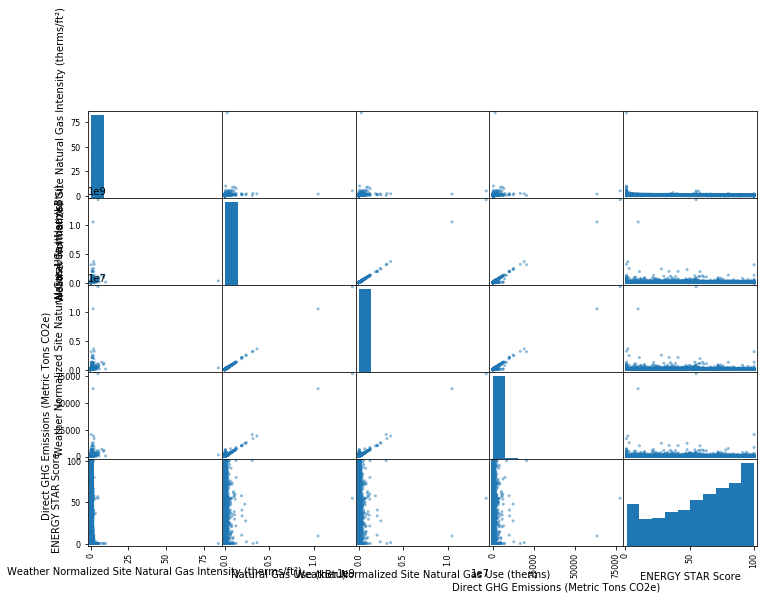

In [181]:
# Here we plotted scatter plot for features with high correlation.

from pandas.plotting import scatter_matrix
attributes = ['Weather Normalized Site Natural Gas Intensity (therms/ft²)', 'Natural Gas Use (kBtu)',
              'Weather Normalized Site Natural Gas Use (therms)', 'Direct GHG Emissions (Metric Tons CO2e)','ENERGY STAR Score']
scatter_matrix(train_data[attributes], figsize=(12, 8))

[0, 2, 0, 100]

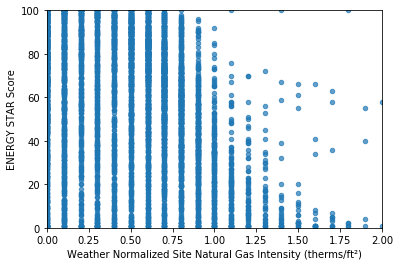

In [182]:
# This scatter plot gives clear picture of how data actually looks like.
# We see vertical lines in the plot
# This plot indicates that in the region of low gas intensity, ENERGY STAR Score of buildings takes almost all values from 0 to 100.

train_data.plot(kind="scatter", x="Weather Normalized Site Natural Gas Intensity (therms/ft²)", y="ENERGY STAR Score",
             alpha=0.7)
plt.axis([0, 2, 0, 100])

[0, 1432251.0, 0, 100]

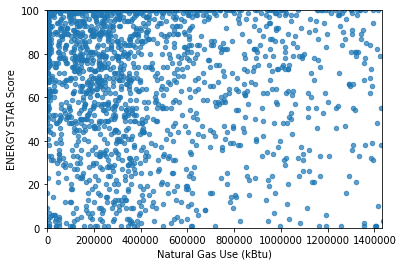

In [183]:
# Here in this plot we see very light desceasing trend in ENERGY STAR Score rating.
# This plot justifies low correlation coefficient.

train_data.plot(kind="scatter", x="Natural Gas Use (kBtu)", y="ENERGY STAR Score",
             alpha=0.7)
plt.axis([0, 1.432251e+06, 0, 100])


[0, 143225.1, 0, 100]

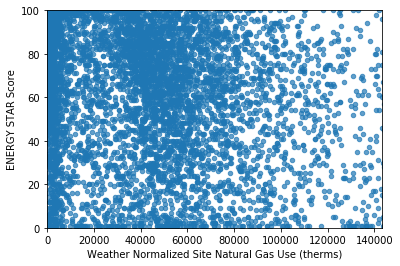

In [184]:
# This plot also shows light decreasing trend in ENERGY STAR Score.
# But this decreasing trend is not very clear. 

train_data.plot(kind="scatter", x="Weather Normalized Site Natural Gas Use (therms)", y="ENERGY STAR Score",
             alpha=0.7)
plt.axis([0, 1.432251e+05, 0, 100])


[0, 2000, 0, 100]

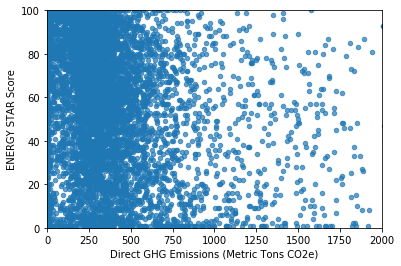

In [185]:
# Here we see clear decreasing trend in the data.

train_data.plot(kind="scatter", x="Direct GHG Emissions (Metric Tons CO2e)", y="ENERGY STAR Score",
             alpha=0.7)
plt.axis([0, 2000, 0, 100])


From these scatter plots we observe that there are unusual pattern in the data. We also see that even though these features have high correlation with respect to others, they look like uncorrelated.

We have plotted scatter plot of those features which have very low correlation.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC7B8F3B08>,
      dtype=object)

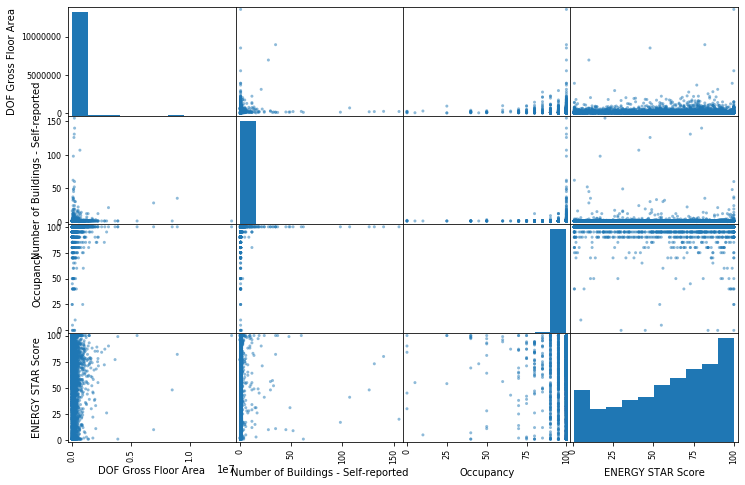

In [186]:
from pandas.plotting import scatter_matrix
attributes = ['DOF Gross Floor Area', 'Number of Buildings - Self-reported', 'Occupancy', 'ENERGY STAR Score']
scatter_matrix(train_data[attributes], figsize=(12, 8))

[0, 5, 0, 100]

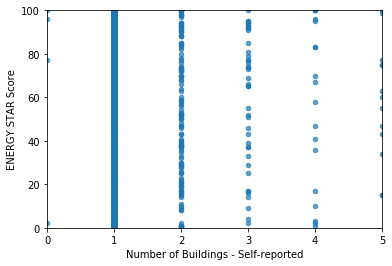

In [187]:
train_data.plot(kind="scatter", x="Number of Buildings - Self-reported", y="ENERGY STAR Score",
             alpha=0.7)
plt.axis([0, 5, 0, 100])

[50000, 90000, 0, 100]

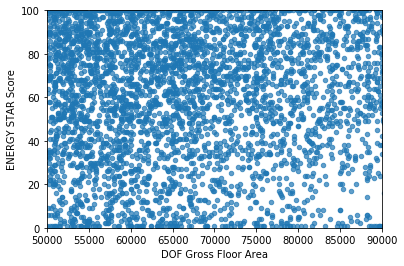

In [188]:
train_data.plot(kind="scatter", x="DOF Gross Floor Area", y="ENERGY STAR Score",
             alpha=0.7)
plt.axis([50000, 90000, 0, 100])

From above plots it seems that these features are almost uncorrelated.

# Prepare data for machine learning algorithm

This data contains only numerical features and not categorical. Hence no any processing step related to categorical features.

In [159]:
# split the data in to dependent and independent variables for regression.
# train_labels consist of ground truth values for instances(ENERGY STAR Score)
# train_data consist of features used in ML model.

train_labels = train_data['ENERGY STAR Score']
train_data = train_data.drop('ENERGY STAR Score', axis = 1)

### Filling missing values

In [160]:
# Filling the missing values with median values of corresponding features using sklearn's simpleImputer.
# Here we fit the imputer to training data.

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(train_data)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [161]:
# Medians of all the features in the dataset.
imputer.statistics_

array([9.0446000e+04, 1.0000000e+00, 1.0000000e+02, 7.9200000e+01,
       8.3200000e+01, 5.1000000e+00, 5.0000000e-01, 1.2870000e+02,
       4.2221378e+06, 4.5387700e+04, 1.7611691e+06, 5.1342920e+05,
       4.9690000e+02, 2.8030000e+02, 1.6430000e+02, 9.1997000e+04,
       4.8933000e+03, 4.7250000e+01, 1.2430000e+02, 7.0000000e+00,
       1.0000000e+01, 2.2200000e+02])

In [162]:
# Here we transform training data using already fitted imputer.
# This gives trainig data which has no any null values.

X = imputer.transform(train_data)

# Convert array X in to dataframe.

train_data = pd.DataFrame(data = X, columns = train_data.columns, index = train_data.index)
train_data.head()

,DOF Gross Floor Area,Number of Buildings - Self-reported,Occupancy,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),...,Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Community Board,Council District,Census Tract
7521,156840.0,1.0,100.0,155.0,83.2,12.9,1.2,128.7,18930898.5,206152.3,...,1745.4,1007.3,738.0,173640.0,4893.3,47.25,258.4,6.0,39.0,49.0
6553,111270.0,1.0,100.0,102.4,110.8,2.7,0.0,131.4,332648.5,3326.5,...,858.7,760.5,98.2,111355.0,4893.3,47.25,123.8,7.0,11.0,413.0
364,169632.0,1.0,100.0,66.0,70.2,1.3,0.7,82.9,3482725.5,37169.5,...,208.2,185.0,23.2,56534.0,4893.3,47.25,78.6,13.0,47.0,37401.0
793,55947.0,1.0,100.0,71.2,75.1,4.0,0.0,105.1,133811.8,1352.8,...,307.6,233.8,73.8,55947.0,2049.8,36.64,102.3,3.0,2.0,3002.0
735,60000.0,1.0,100.0,139.8,140.1,40.6,0.0,436.9,77270.0,943.3,...,840.4,4.1,836.3,65000.0,1538.9,23.67,436.6,2.0,1.0,47.0


In [163]:
train_data.info()

# Final training data consist of 7713 non-null instances.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713 entries, 7521 to 8981
Data columns (total 22 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   DOF Gross Floor Area                                        7713 non-null   float64
 1   Number of Buildings - Self-reported                         7713 non-null   float64
 2   Occupancy                                                   7713 non-null   float64
 3   Site EUI (kBtu/ft²)                                         7713 non-null   float64
 4   Weather Normalized Site EUI (kBtu/ft²)                      7713 non-null   float64
 5   Weather Normalized Site Electricity Intensity (kWh/ft²)     7713 non-null   float64
 6   Weather Normalized Site Natural Gas Intensity (therms/ft²)  7713 non-null   float64
 7   Weather Normalized Source EUI (kBtu/ft²)                    7713 non-null   float64


### Feature Scaling

In [164]:
# Here we are scaling the data using StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)

# Select and  Train Model

About model training proscess- We don't know before hand about relationshop between given features and ENERGY  STAR SCORE. We don't know whether this relation is linear or non-linear. So we decided to use trial and error approach. Here first we have trained linear as well as non-linear models with default parametes setting(of sklearn). Then we measured 
performance of all the models using RMSE metric. We found good model with least RMSE on validation set. We also look for model overfitting. We got our good model. Then we performed parameter tuning of good model using grid search.Once we got best tuned parameters we trained good model with good  parameters on whole training set and made predictions on test set.

### Simple Linear Regression Model

In [29]:
# Here we have trained linear regression model using cross validation.
# Here we have used 5-fold cross validation.
# We use 'root mean squared error' as our performance metric.
# We get RMSE score of both training and test data for each fold.

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression(random_state = 42)

# Here lin_reg_score consist of following parameters
#1 fit_time
#2 score_time
#3 test_score
#4 train_score

from sklearn.model_selection import cross_validate
lin_reg_score = cross_validate(lin_reg, train_data, train_labels,
                          scoring='neg_mean_squared_error', cv=5, return_train_score = True)


In [32]:
# This function display the score obtained after training usign cross validation.
# This function display actual score, mean score and standard deviation of score.
# Each value of score is obtained in each fold during training.

def display_cv_score(score):
    print("Score on Training data.")
    print("Train Scores:", np.sqrt(-score['train_score']))
    print("Mean Score:", np.sqrt(-score['train_score']).mean())
    print("Standard Deviation:", np.sqrt(-score['train_score']).std())
    print("Score on Test data.")
    print("Test Scores:", np.sqrt(-score['test_score']))
    print("Mean Score:", np.sqrt(-score['test_score']).mean())
    print("Standard Deviation:", np.sqrt(-score['test_score']).std())

display_cv_score(lin_reg_score)

Score on Training data.
Train Scores: [27.12465822 27.36242867 27.26402604 27.24960516 27.06519713]
Mean Score: 27.213183044187804
Standard Deviation: 0.10575662142873038
Score on Test data.
Test Scores: [32.36560374 27.08146722 28.1217763  27.29178417 28.37618224]
Mean Score: 28.647362733116864
Standard Deviation: 1.921703313059134


### Ridge Regression Model

In [33]:
# Here we have trained Ridge regression model using cross validation for different values of alpha.
# Here we have used 5-fold cross validation.
# We use 'root mean squared error' as our performance metric.
# We get RMSE score of both training and test data for each fold.
# We print values of RMSE for each value of alpha.

from sklearn.linear_model import Ridge

alpha_values = [1, 5, 10, 50, 100]
for i in alpha_values:
    ridge_reg = Ridge(alpha = i, random_state = 42)
    score = cross_validate(ridge_reg, train_data, train_labels,
                          scoring='neg_mean_squared_error',cv=5, return_train_score = True)
    print("**************************************************************************")
    print("Scores for alpha = ", i)
    display_cv_score(score)

*************************************************************
Scores for alpha =  1
Score on Training data.
Train Scores: [27.28825852 27.47754631 27.44353143 27.38879444 27.25308397]
Mean Score: 27.370242935154444
Standard Deviation: 0.08680673084477068
Score on Test data.
Test Scores: [62.62602972 27.41598635 27.79225305 27.48281176 29.7937649 ]
Mean Score: 35.02216915489485
Standard Deviation: 13.829511510984736
*************************************************************
Scores for alpha =  5
Score on Training data.
Train Scores: [27.31214399 27.68417919 27.66277362 27.6040906  27.42269157]
Mean Score: 27.537175791749764
Standard Deviation: 0.14533296415854813
Score on Test data.
Test Scores: [63.53956654 27.66730923 27.72801651 27.61130254 34.3798717 ]
Mean Score: 36.185213304556065
Standard Deviation: 13.922002099106214
*************************************************************
Scores for alpha =  10
Score on Training data.
Train Scores: [27.31848547 27.91287207 27.89188114 2

### Lasso Regression

In [34]:
# Here we have trained Ridge regression model using cross validation for different values of alpha.
# Here we have used 5-fold cross validation.
# We use 'root mean squared error' as our performance metric.
# We get RMSE score of both training and test data for each fold.
# We print values of RMSE for each value of alpha.

from sklearn.linear_model import Lasso

alpha_values = [1, 5, 10, 50, 100]
for i in alpha_values:
    lasso_reg = Lasso(alpha = i, random_state = 42)
    score = cross_validate(lasso_reg, train_data, train_labels,
                          scoring='neg_mean_squared_error',cv=5, return_train_score = True)
    print("**************************************************************************************")
    print("Scores for alpha = ", i)
    display_cv_score(score)
    

***************************************************************************
Scores for alpha =  1
Score on Training data.
Train Scores: [28.03071857 29.3363908  29.33530574 29.26476435 28.87756875]
Mean Score: 28.968949639019854
Standard Deviation: 0.49907196741067356
Score on Test data.
Test Scores: [45.73727572 28.70188259 28.79216007 29.04071109 30.25697143]
Mean Score: 32.50580018065974
Standard Deviation: 6.639230830197785
***************************************************************************
Scores for alpha =  5
Score on Training data.
Train Scores: [29.77927331 29.98461971 29.98291258 29.91022844 29.75460837]
Mean Score: 29.88232848044108
Standard Deviation: 0.09827701795228194
Score on Test data.
Test Scores: [30.29419276 29.47179369 29.48045706 29.77353575 30.3918634 ]
Mean Score: 29.882368530748323
Standard Deviation: 0.39271702850098816
***************************************************************************
Scores for alpha =  10
Score on Training data.
Train Score

### Decision Tree Regressor

In [88]:
# Here we have trained Decision regression model using cross validation.
# Here we have used 5-fold cross validation.
# We use 'root mean squared error' as our performance metric.
# We get RMSE score of both training and test data for each fold.

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

from sklearn.model_selection import cross_validate
tree_reg_score = cross_validate(tree_reg, train_data, train_labels,
                          scoring='neg_mean_squared_error',cv=5, return_train_score = True)

display_cv_score(tree_reg_score)

Score on Training data.
Train Scores: [0. 0. 0. 0. 0.]
Mean Score: 0.0
Standard Deviation: 0.0
Score on Test data.
Test Scores: [21.97904499 21.82510164 22.14190082 23.49622593 22.99412038]
Mean Score: 22.48727875128836
Standard Deviation: 0.6466728452974011


### Random Forest Regressor

In [40]:
# Here we have trained Decision regression model using cross validation.
# Here we have used 5-fold cross validation.
# We use 'root mean squared error' as our performance metric.
# We get RMSE score of both training and test data for each fold.
# We set number of trees to 100.

from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 42)

from sklearn.model_selection import cross_validate
rf_reg_score = cross_validate(rf_reg, train_data, train_labels,
                        scoring='neg_mean_squared_error',cv = 5, return_train_score = True)

display_cv_score(rf_reg_score)

Score on Training data.
Train Scores: [6.03063053 6.06628516 6.0516816  6.02116222 5.97971208]
Mean Score: 6.029894318403723
Standard Deviation: 0.02964465287361728
Score on Test data.
Test Scores: [16.2848884  15.87885965 15.80303635 16.08709202 16.28375458]
Mean Score: 16.06752620122929
Standard Deviation: 0.19996690269333545


### Support vector Regressor with linear kernel

In [43]:
# Here we have trained Decision regression model using cross validation.
# Here we have used 5-fold cross validation.
# We use 'root mean squared error' as our performance metric.
# We get RMSE score of both training and test data for each fold.
# Here we have used linear kernel.

from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")

from sklearn.model_selection import cross_validate
svm_reg_score = cross_validate(svm_reg, train_data, train_labels,
                         scoring='neg_mean_squared_error',cv = 5, return_train_score = True)

display_cv_score(svm_reg_score)

Score on Training data.
Train Scores: [29.27875393 44.74761402 45.31143541 45.36464291 39.62133812]
Mean Score: 40.86475687779125
Standard Deviation: 6.178673940106188
Score on Test data.
Test Scores: [91.65514531 30.10943964 28.25536596 28.6197426  35.08125921]
Mean Score: 42.74419054756137
Standard Deviation: 24.576675978929664


### SVR with Gaussian kernel

In [46]:
# Here we have trained Decision regression model using cross validation.
# Here we have used 5-fold cross validation.
# We use 'root mean squared error' as our performance metric.
# We get RMSE score of both training and test data for each fold.
# Here we have used Gaussian kernel.

from sklearn.svm import SVR
svm_reg = SVR(kernel="rbf")

from sklearn.model_selection import cross_validate
svm_reg_score = cross_validate(svm_reg, train_data, train_labels,
                         scoring='neg_mean_squared_error',cv = 5, return_train_score = True)

display_cv_score(svm_reg_score)

Score on Training data.
Train Scores: [26.70667201 26.84750856 26.92484426 26.9959485  26.79302548]
Mean Score: 26.85359976356698
Standard Deviation: 0.100631061809743
Score on Test data.
Test Scores: [27.52183904 26.59094765 26.39489201 26.79763729 27.36244913]
Mean Score: 26.933553023659005
Standard Deviation: 0.4372732617722676


### Gradient Boosting Regressor

In [49]:
# Here we have trained gradient boosting regression model using cross validation.
# Here we have used 5-fold cross validation.
# We use 'root mean squared error' as our performance metric.
# We get RMSE score of both training and test data for each fold.

from sklearn.ensemble import GradientBoostingRegressor
GB_reg = GradientBoostingRegressor()

from sklearn.model_selection import cross_validate
GB_reg_score = cross_validate(GB_reg, train_data, train_labels,
                         scoring='neg_mean_squared_error',cv = 5, return_train_score = True)

display_cv_score(GB_reg_score)

Score on Training data.
Train Scores: [14.4567019  14.60973889 14.65693696 14.51169518 14.61119193]
Mean Score: 14.569252971416256
Standard Deviation: 0.07357596249106364
Score on Test data.
Test Scores: [16.39683894 15.55342076 15.62448411 16.12874419 15.964271  ]
Mean Score: 15.933551800447287
Standard Deviation: 0.3142295855092868


#### From all above trained models we saw that Gradient boosting regressor model has least RMSE with less overfitting. Hence we chose Gradient Boosting Regressor as final model. 

# Fine-Tune best model

### Fine tune gradient boosting regressor model

In [74]:
# We have done parameter search using GridSearchCV method.
# We have experimented with following four model parameters.
#1 n_estimators
#2 max_depth
#3 learning_rate
#4 max_features
# We have considered following values for there parameters.

parameter_grid = [
    {'n_estimators': [10,50, 100, 200], 'max_depth': range(3, 8), 'learning_rate': [0.15, 0.1, 0.05, 0.02], 'max_features':[1.0, 0.3]}
]

In [77]:
# We have defined function for performing grid seach.
# Grid search is performed with gradient boosting regressor, 5-fold cross validation.
# This function returns best estimator searched and its corresponding  best score.

def GBR_GSCV(parameter_grid):
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.model_selection import GridSearchCV
    GB_reg = GradientBoostingRegressor()
    
    gscv = GridSearchCV(GB_reg, parameter_grid, cv = 5,
                   scoring = 'neg_mean_squared_error',
                   return_train_score = True)    
    gscv.fit(train_data, train_labels)
    
    return gscv.cv_results_, gscv.best_estimator_, gscv.best_score_ 
    
GB_cv_results, GB_best_estimator, GB_best_score = GBR_GSCV(parameter_grid = parameter_grid)   

In [79]:
# Following is the best estimator with given parameters.
print(GB_best_estimator)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=7,
                          max_features=0.3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [83]:
print("Best mean squared error is", np.sqrt(-GB_best_score))

Best mean squared error is 15.637362077729744


# Making Predictions on Test Data

### Preparing  test data

In [165]:
# Dropping non-numerical features from test data.
test_data = drop_features(test_set, features_to_drop)

# Changing data type from 'object' to 'float64'
test_data = Change_to_float(test_data)

# Dropping columns having large proportion of null values.
test_data = drop_null_columns(test_data)

# Seperating ground truth labels and other features.
test_labels = test_data['ENERGY STAR Score']
test_data = test_data.drop('ENERGY STAR Score', axis = 1)

# Filling null values.
X_test = imputer.transform(test_data)
test_data = pd.DataFrame(data = X_test, columns = test_data.columns, index = test_data.index)

# Feature scaling in test data.
test_data = scaler.transform(test_data)


### Training Gradient Boosting Regressor on  complete training data

In [166]:
# Here we have trained final gradient boosting regression model using cross validation.
# Here estimator used is best estimator obtained in grid search.

from sklearn.ensemble import GradientBoostingRegressor
final_model = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=7,
                          max_features=0.3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

final_model.fit(train_data, train_labels)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=7,
                          max_features=0.3, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [167]:
# Making Prediction on train data.
predictions = final_model.predict(test_data)

# Calculating RMSE on test data.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_labels, predictions)
rmse = np.sqrt(mse)
print("RMSE of test data is ", rmse)


RMSE of test data is  16.585100671177464
